In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.4 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=541d30f67c19e8d4d8977d864f13a206895042dab2f737122fcc6e5034ba54e5
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.1 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=ced3f4bc5a0e6d4bb19b31cc08b8ec2fdeb61e4d7df95274cfe0b004bd5d5e9a
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6880ba841e7f0166d505fc808429e88798ea9e430369

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [23]:
book = "sachin_story_of_my_life"
startdate = 1700
enddate = 2020
wikilink = "https://en.wikipedia.org/wiki/Sachin_Tendulkar"
titlename = "Sachin Tendulkar"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

44
1/chapter1


2023-04-08 11:41:50,639 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
1/chapter25
1/chapter26
1/chapter27
1/chapter28
1/chapter29
1/chapter30
1/chapter31
1/chapter32
1/chapter33
1/chapter34
1/chapter35
1/chapter36
1/chapter37
1/chapter38
1/chapter39
1/chapter40
1/chapter41
1/chapter42
1/chapter43
1/chapter44


In [9]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [10]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
14
15
15
15
15


In [11]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'World Cup Debut', 'school level', 'double century', 'committee meeting', 'indian world cup campaign', 'interview shortly', 'acrimonious international', 'Test Cricket', 'best junior cricketer', 'months', 'Sachin Tendulkar captain', 'outstanding tournament', 'indian cricketannual', 'mumbai cricket', 'batsman', 'cricket world', 'match', 'World Cup', 'school ofbatsmanship', 'cricket team', 'ranji trophy', 'disappointed', 'Tendulkar Tendulkar stand', 'naturally uppermost', 'beard and smuggle', 'Sachin Sachin scoring', 'Indians', 'difference', 'tendulkar captain', 'television interview', 'months-not seven years-after', 'understand', 'boundaries', 'foreign soil', 'difficult', 'remarkable display', 'characteristic comments', 'practising paediatrician', 'match saving', 'innings defeat', 'overseas player', 'tendulkar top', 'father funeral', 'cricket history', 'indications', 'sports notably', 'Journey Playingfor India', 'cricket practices', 'world cup game', 'Alice in rMmderland', 'cricket matc

In [12]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Refer_To_Sir_1981': ['1/chapter1'], 'School_Ofbatsmanship_1981': ['1/chapter1'], 'Sports_Notably_1981': ['1/chapter1'], 'Indian_Cricket_1981': ['1/chapter1'], 'Oflndian_Cricket_1981': ['1/chapter1'], 'Oflndian_Cricket_2000': ['1/chapter30'], 'Oflndian_Cricket_2001': ['1/chapter34'], 'Sachin_1981': ['1/chapter1'], 'Sachin_1985': ['1/chapter2'], 'Sachin_1988': ['1/chapter3'], 'Sachin_1989': ['1/chapter4', '1/chapter5'], 'Sachin_1990': ['1/chapter6'], 'Sachin_1993': ['1/chapter12'], 'Sachin_1994': ['1/chapter13'], 'Sachin_1996': ['1/chapter17', '1/chapter20'], 'Sachin_1998': ['1/chapter21'], 'Sachin_2000': ['1/chapter29'], 'Sachin_2001': ['1/chapter34', '1/chapter35'], 'Years_Sachin_1981': ['1/chapter1'], 'Understand_1981': ['1/chapter1'], 'Preferred_To_Refer_1981': ['1/chapter1'], 'Adult_Sachin_1981': ['1/chapter1'], 'Year_Sachin_1981': ['1/chapter1'], 'Sachin_Tendulkar_1996': ['1/chapter20'], 'Sachin_Tendulkar_1999': ['1/chapter27'], 'Sachin_Tendulkar_2000'

In [13]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [ ]:
key_yr_chap_mp

defaultdict(list,
            {'Sachin_1981': ['1/chapter1'],
             'Sachin_1985': ['1/chapter2'],
             'Sachin_1989': ['1/chapter3', '1/chapter4', '1/chapter5'],
             'Sachin_1990': ['1/chapter6'],
             'Sachin_1993': ['1/chapter12'],
             'Sachin_1994': ['1/chapter13'],
             'Sachin_1996': ['1/chapter17', '1/chapter20'],
             'Sachin_1998': ['1/chapter21'],
             'Sachin_2000': ['1/chapter29'],
             'Sachin_1995': ['1/chapter34'],
             'Sachin_2001': ['1/chapter35'],
             'Understand_1981': ['1/chapter1'],
             'Oflndian_Cricket_1981': ['1/chapter1'],
             'Oflndian_Cricket_2000': ['1/chapter30'],
             'Oflndian_Cricket_1995': ['1/chapter34'],
             'Year_Sachin_1981': ['1/chapter1'],
             'Sports_Notably_1981': ['1/chapter1'],
             'School_Ofbatsmanship_1981': ['1/chapter1'],
             'Indian_Cricket_1981': ['1/chapter1'],
             'Refer_To_Si

In [14]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Refer_To_Sir_1981
School_Ofbatsmanship_1981
Sports_Notably_1981
Indian_Cricket_1981
Oflndian_Cricket_1981
Oflndian_Cricket_2000
Oflndian_Cricket_2001
Sachin_1981
Sachin_1985
Sachin_1988
Sachin_1989
Sachin_1990
Sachin_1993
Sachin_1994
Sachin_1996
Sachin_1998
Sachin_2000
Sachin_2001
Years_Sachin_1981
Understand_1981
Preferred_To_Refer_1981
Adult_Sachin_1981
Year_Sachin_1981
Sachin_Tendulkar_1996
Sachin_Tendulkar_1999
Sachin_Tendulkar_2000
Sachin_Tendulkar_2001
Sachin_Tendulkar_2004
Housing_Society_1981
Cricket_1992
School_Tournaments_1985
Cricket_Club_1985
Hockey_And_Football_1985
Day_1985
Day_1989
Day_1990
Day_1992
Day_1993
Day_1994
Day_1997
Day_1999
Day_2000
Day_1998
Day_2001
Day_2008
Treacherous_Pitches_1985
Test_Cricketers_1985
Natural_Cricketer_1985
Batsman_1985
Batsman_1989
Batsman_1990
Batsman_1992
Batsman_1993
Batsman_1994
Batsman_1996
Batsman_1997
Batsman_1998
Batsman_1999
Batsman_2000
Batsman_2001
Batsman_2002
Batsman_2005
Batsman_2008
School_Cricketer_1985
Best_Junior_Crickete

In [15]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [16]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_years', 'Early_career', 'Yorkshire', 'International_career', 'Early_tours', 'Rise_through_the_ranks', '1994–1996:_ODI_matches', '1998:_Australian_competition', '1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup', 'Captaincy_of_national_team', 'South_Africa_match_fixing', 'Role_in_2007_captaincy_change', 'Continued_rise', "2001–2002:_Mike_Denness_incident,_Kolkata_Test,_and_breaking_Bradman's_record", '2003:_Cricket_World_Cup', '2003–2004:_tour_of_Australia', 'Performance_dip', '2005–2006:_dry_spell', '2007_Cricket_World_Cup', 'Return_to_old_form_and_consistency', '2007', '2007–08_tour_of_Australia', 'Home_series_against_South_Africa', 'Sri_Lanka_series', "Return_to_form_and_breaking_Brian_Lara's_record", 'ODI_and_Test_series_against_England', '2009–2010', '2011_Cricket_World_Cup_and_after', '100th_international_century', 'Return_to_Ranji_Trophy', 'Retirement', 'Post-retirement', 'Exhibition_and_charity_matches', 'Indian_Premier_League', 'Playing_style', 'Reception'

In [17]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [18]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [19]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [20]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [21]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

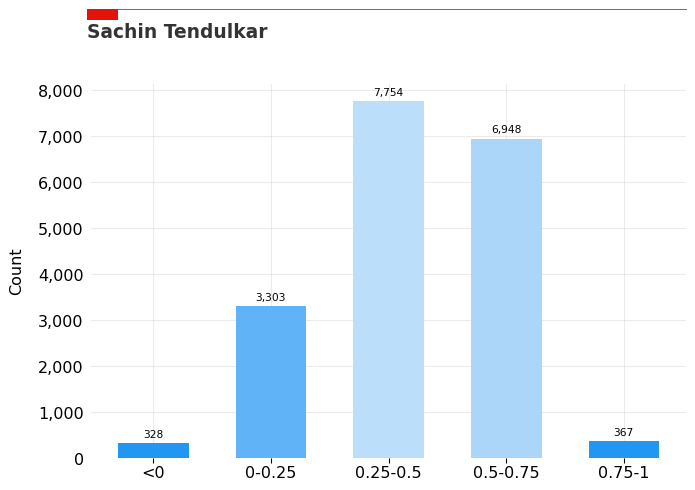

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [25]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_years': 1987, 'Early_career': 1989, 'Yorkshire': 1992, 'International_career': -1, 'Early_tours': 1990, 'Rise_through_the_ranks': -1, '1994–1996:_ODI_matches': 1994, '1998:_Australian_competition': 1998, '1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup': 1999, 'Captaincy_of_national_team': 1997, 'South_Africa_match_fixing': 2000, 'Role_in_2007_captaincy_change': 2007, 'Continued_rise': -1, "2001–2002:_Mike_Denness_incident,_Kolkata_Test,_and_breaking_Bradman's_record": 2001, '2003:_Cricket_World_Cup': 2003, '2003–2004:_tour_of_Australia': 2003, 'Performance_dip': -1, '2005–2006:_dry_spell': 2006, '2007_Cricket_World_Cup': 2007, 'Return_to_old_form_and_consistency': -1, '2007': 2007, '2007–08_tour_of_Australia': 2008, 'Home_series_against_South_Africa': 2008, 'Sri_Lanka_series': 2008, "Return_to_form_and_breaking_Brian_Lara's_record": -1, 'ODI_and_Test_series_against_England': 2008, '2009–2010': 2009, '2011_Cricket_World_Cup_and_after': 2011, '100th_international_

In [26]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [27]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


343


In [28]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_years   ->  291
Early_career   ->  311
Yorkshire   ->  303
Early_tours   ->  310
1994–1996:_ODI_matches   ->  316
1998:_Australian_competition   ->  316
1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup   ->  317
Captaincy_of_national_team   ->  318
South_Africa_match_fixing   ->  313
Role_in_2007_captaincy_change   ->  293
2001–2002:_Mike_Denness_incident,_Kolkata_Test,_and_breaking_Bradman's_record   ->  315
2003:_Cricket_World_Cup   ->  310
2003–2004:_tour_of_Australia   ->  316
2005–2006:_dry_spell   ->  320
2007_Cricket_World_Cup   ->  306
2007   ->  314
2007–08_tour_of_Australia   ->  190
Home_series_against_South_Africa   ->  309
Sri_Lanka_series   ->  308
Return_to_form_and_breaking_Brian_Lara's_record   ->  317
ODI_and_Test_series_against_England   ->  319
2009–2010   ->  317
2011_Cricket_World_Cup_and_after   ->  317
100th_international_century   ->  318
Return_to_Ranji_Trophy   ->  311
Retirement   ->  309
Post-retirement   ->  286
Exhibition_and_charity_m

In [29]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [30]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_years  ->   ['Sachin_Sachin_Scoring_1985', 'Best_Junior_Cricketer_1985', 'School_Cricketer_1985', 'Natural_Cricketer_1985', 'Sachin_1985']
Early_career  ->   ['Mumbai_Ranji_Trophy_1989', 'Mumbai_Ranji_1989', 'Batsman_1989', 'West_Indies_Debacle_1989', 'India_1989']
Yorkshire  ->   ['Batsman_Farokh_Engineer_1992', 'Cricketer_1992', 'Cricket_History_1992', 'Tendulkar_1992', 'Tendulkar_Top_1992']
Early_tours  ->   ['Batsman_1990', 'Test_Cricketer_1990', 'Sachin_1990', 'Test_Cricket_1990', 'Tendulkar_1990']
1994–1996:_ODI_matches  ->   ['Tendulkar_1994', 'Seventieth_Odi_1994', 'Overs_Cricket_1994', 'Odi_1994', 'Wickets_1994']
1998:_Australian_competition  ->   ['Time_Tendulkar_1998', 'International_Cricket_1998', 'Tendulkar_1998', 'World_Cricket_1998', 'Test_Cricket_1998']
1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup  ->   ['Pakistan_Clash_1999', 'Indian_1999', 'Cricket_World_1999', 'Pakistan_1999', 'Cricket_Fans_1999']
Captaincy_of_national_team  ->   ['India_Bat_1

In [31]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [32]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [33]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [34]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Match', 'Kambli', 'Batsman', 'Pakistan Match', 'Test Cricketer', 'Wickets', 'Sachin', 'Tendulkar', 'Indian', 'India', 'Tendulkar Top', 'Fourth Innings', 'Sachin Tendulkar', 'Cricket World', 'Selectors', 'Selection Committee', 'Captain', 'World Cup', 'International Debut', 'Pakistan', 'Test Cricket', 'Time Tendulkar', 'World Cricket', 'International Cricket', 'Oflndian Cricket', 'West Indies', 'South Mrica', 'Day', 'Captain Tendulkar', 'Odi', 'Batting', 'Innings Lead', 'Australia', 'Fast Bowler', 'India Bat', 'Match Referee', 'Runs', 'Double Century', 'Test Series', 'Sri Lanka']
40
{'Early_years': 2, 'Early_career': 1, 'Yorkshire': 1, 'Early_tours': 2, '1994–1996:_ODI_matches': 2, '1998:_Australian_competition': 1, '1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup': 2, 'Captaincy_of_national_team': 0, 'South_Africa_match_fixing': 0, 'Role_in_2007_captaincy_change': 1, "2001–2002:_Mike_Denness_incident,_Kolkata_Test,_and_breaking_Bradman's_record": 2, '2003:_Cricket_World

In [35]:
print(sum(list(mp2.values())))

21


In [36]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_years': set(), 'Early_career': set(), 'Yorkshire': set(), 'Early_tours': set(), '1994–1996:_ODI_matches': set(), '1998:_Australian_competition': set(), '1999:_Asian_Test_Championship,_Test_matches,_and_the_World_Cup': set(), 'Captaincy_of_national_team': set(), 'South_Africa_match_fixing': set(), 'Role_in_2007_captaincy_change': set(), "2001–2002:_Mike_Denness_incident,_Kolkata_Test,_and_breaking_Bradman's_record": set(), '2003:_Cricket_World_Cup': set(), '2003–2004:_tour_of_Australia': set(), '2005–2006:_dry_spell': set(), '2007_Cricket_World_Cup': set(), '2007': set(), 'Home_series_against_South_Africa': set(), "Return_to_form_and_breaking_Brian_Lara's_record": set(), 'ODI_and_Test_series_against_England': set(), '100th_international_century': set(), 'Post-retirement': set(), 'Playing_style': set(), 'Wins': set(), 'Personal_life': set(), 'Political_career': set()}
{'Early_years': 0, 'Early_career': 0, 'Yorkshire': 0, 'Early_tours': 0, '1994–1996:_ODI_matches': 0, '1998:_Austr

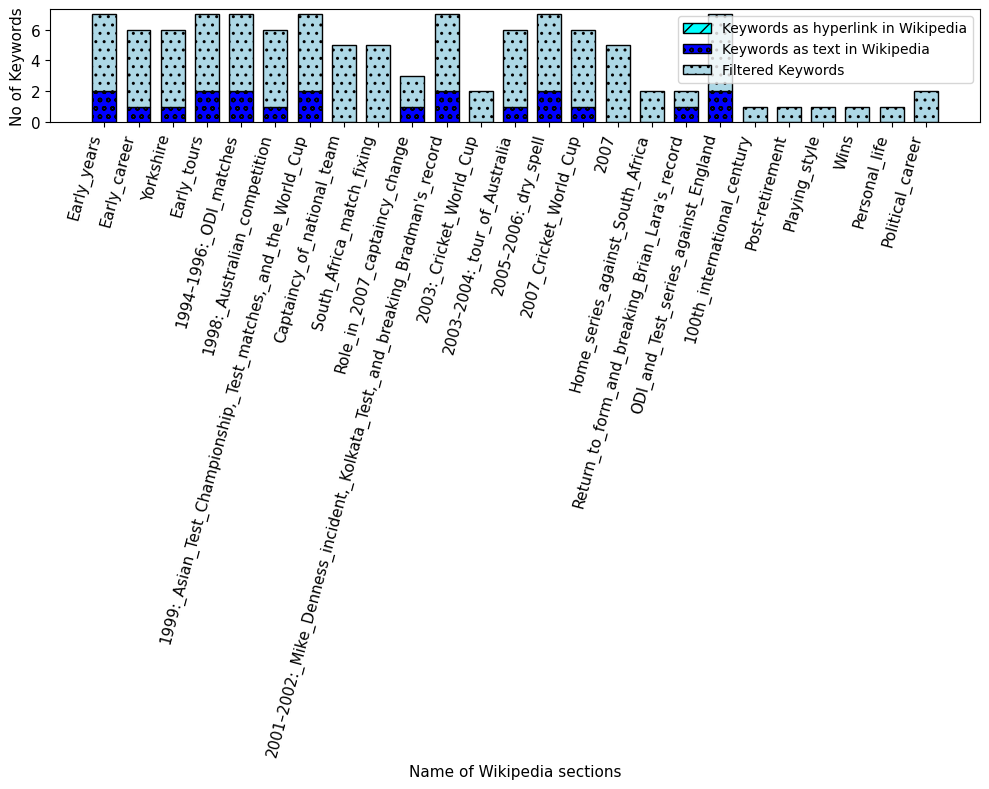

In [45]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [38]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Test_Cricketer', 'Batsman_Farokh_Engineer', 'International_Cricket', 'Test_Batsman', 'Decades_Sachin', 'Charity_Dinner', 'Cricket_Fans', 'Captaincy', 'Tendulkar_Top', 'Cricket_Lovers', 'Natural_Cricketer', 'World_Cup_Woes', 'Cricket_World', 'School_Cricketer', 'Elusive_Century', 'Indian', 'Innings_Average', 'Tendulkar_Midway', 'Time_Tendulkar', 'Cricketer', 'Wickets', 'West_Indies_Debacle', 'Pakistan_Clash', 'Batsman', 'Sachin_Tendulkar', 'India_Bat', 'Date_Tendulkar', 'Fast_Bowler', 'Overs_Cricket', 'Sports_Notably', 'Runs_Average', 'Percentage_Dropped', 'Moral_Responsibilityfor', 'Day', 'Sachin_Sachin_Scoring', 'Seventieth_Odi', 'Sachin_Tendulkar.', 'Father_Funeral', 'Wicket_Ofsehwag', 'Tendulkar', 'Fourth_Innings', 'Best_Junior_Cricketer', 'Selection_Committee', 'Odi_History', 'World_Cricket', 'Eel_Ipsed_Tendulkar', 'Mumbai_Ranji_Trophy', 'Cricket_History', 'Secular_Saint', 'Practising_Paediatrician', 'Mumbai_Ranji', 'India', 'West_Indies_Captain', 'Test_Cricket', 'Pakistan', 'Odi

In [39]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

2059
{'Manika_Batra', 'Niren_De', 'Adam_Gilchrist', 'Pankaj_Advani_(billiards_player)', 'M._S._Swaminathan', 'Rajeshwar_Dayal', 'Template:Padma_Shri_Award_Recipients_in_Sports', 'C._R._Rao', 'Mohammad_Kaif', 'Trinidad_and_Tobago', 'Ravi_Kumar_Dahiya', 'Category:Articles_with_unsourced_statements_from_March_2023', 'Madhumita_Bisht', 'Sudhir_Kumar_Chaudhary', 'Category:West_Zone_cricketers', 'Second_Test,_2007%E2%80%9308_Border%E2%80%93Gavaskar_Trophy', 'Chandraprabha_Aitwal', 'Special:BookSources/978-81-7436-898-0', 'Kalyan_Singh', 'Aashish_Kapoor', 'Dinesh_Karthik', 'Suresh_Raina', 'Cricket_Club_of_India', 'Ghaus_Mohammad', 'Special:BookSources/978-81-237-6524-2', 'Template_talk:Batsmen_with_a_Test_batting_average_above_50', 'Sushil_Doshi', 'Gulabrai_Ramchand', 'Category:Pages_using_Sister_project_links_with_default_search', 'West_Indian_cricket_team_in_India_in_2013%E2%80%9314#Second_Test', 'Category:Articles_containing_potentially_dated_statements_from_2013', 'Batting_average_(cricke

In [40]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'India'}


1

In [41]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Tendulkar_Midway_2000', 'Odi_1994', 'World_Cricket_1998', 'Batsman_Farokh_Engineer_1992', 'Batsman_2008', 'Fast_Bowler_2007', 'Wickets_1994', 'India_Bat_1997', 'Day_1994', 'World_Cricket_2007', 'Tendulkar_Top_2001', 'Father_Funeral_1999', 'Sachin_Sachin_Scoring_1985', 'Sachin_Tendulkar_2004', 'Tendulkar_1998', 'Batsman_2000', 'Batsman_2002', 'Tendulkar_2008', 'Natural_Cricketer_1985', 'Test_Cricketer_1990', 'Tendulkar_1994', 'Test_Cricket_1998', 'Wickets_2007', 'Date_Tendulkar_2007', 'Moral_Responsibilityfor_2000', 'Sachin_1990', 'Indian_1999', 'Charity_Dinner_1948', 'Fourth_Innings_2008', 'Captaincy_2007', 'Elusive_Century_1994', 'Batsman_1989', 'International_Cricket_1998', 'World_Cup_Woes_2007', 'Sachin_Tendulkar._2001', 'Test_Cricket_2004', 'Test_Batsman_2001', 'Wicket_Ofsehwag_2005', 'Tendulkar_Top_1992', 'Tendulkar_2005', 'Sachin_Tendulkar_Tendulkar_2000', 'Selection_Committee_2000', 'Wickets_2002', 'Runs_Average_1948', 'Mumbai_Ranji_Trophy_1989', 'Tendulkar_1990', 'Cricket_Lov

In [42]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Sports_Notably_1981': ['1/chapter1'], 'Sachin_1985': ['1/chapter2'], 'Sachin_1990': ['1/chapter6'], 'Sachin_Tendulkar_2000': ['1/chapter30', '1/chapter38'], 'Sachin_Tendulkar_2004': ['1/chapter39'], 'Day_1992': ['1/chapter9'], 'Day_1994': ['1/chapter14', '1/chapter15'], 'Natural_Cricketer_1985': ['1/chapter2'], 'Batsman_1989': ['1/chapter5'], 'Batsman_1990': ['1/chapter6'], 'Batsman_1997': ['1/chapter18', '1/chapter19'], 'Batsman_2000': ['1/chapter28', '1/chapter29', '1/chapter38'], 'Batsman_2001': ['1/chapter32'], 'Batsman_2002': ['1/chapter36'], 'Batsman_2005': ['1/chapter40'], 'Batsman_2008': ['1/chapter43'], 'School_Cricketer_1985': ['1/chapter2'], 'Best_Junior_Cricketer_1985': ['1/chapter2'], 'Sachin_Sachin_Scoring_1985': ['1/chapter2'], 'Tendulkar_1990': ['1/chapter6', '1/chapter7'], 'Tendulkar_1992': ['1/chapter9', '1/chapter10', '1/chapter11', '1/chapter37'], 'Tendulkar_1994': ['1/chapter14', '1/chapter15'], 'Tendulkar_1998': ['1/chapter21', '1/chapter23', '1/chapter31', '1/c

In [43]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['tendulkar midway', 'odi', 'world cricket', 'batsman farokh engineer', 'batsman', 'fast bowler', 'wickets', 'india bat', 'day', 'world cricket', 'tendulkar top', 'father funeral', 'sachin sachin scoring', 'sachin tendulkar', 'tendulkar', 'batsman', 'batsman', 'tendulkar', 'natural cricketer', 'test cricketer', 'tendulkar', 'test cricket', 'wickets', 'date tendulkar', 'moral responsibilityfor', 'sachin', 'indian', 'charity dinner', 'fourth innings', 'captaincy', 'elusive century', 'batsman', 'international cricket', 'world cup woes', 'sachin tendulkar.', 'test cricket', 'test batsman', 'wicket ofsehwag', 'tendulkar top', 'tendulkar', 'sachin tendulkar tendulkar', 'selection committee', 'wickets', 'runs average', 'mumbai ranji trophy', 'tendulkar', 'cricket lovers', 'india', 'cricket history', 'fourth innings', 'pakistan', 'india', 'percentage dropped', 'decades sachin', 'cricketer', 'test cricket', 'west indies captain', 'odi history', 'wickets', 'tendulkar', 'pakistan clash', 'sachin'

In [44]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

24
89
0.2696629213483146
